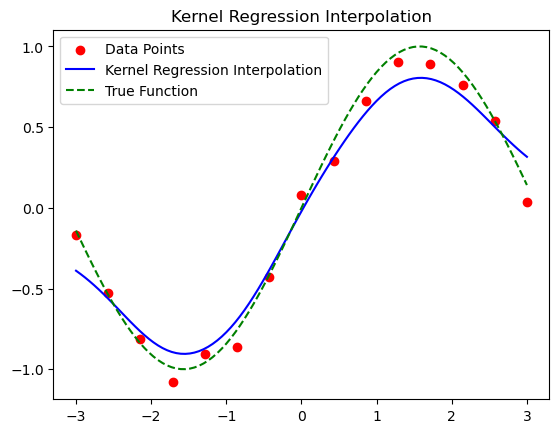

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一组离散的观测数据
np.random.seed(41)
X = np.linspace(-3, 3, 15)  # 观测点
y = np.sin(X) + np.random.normal(scale=0.1, size=X.shape)  # 真实函数带噪声

def gaussian_kernel(x, xi, h):
    """ 高斯核函数 """
    return np.exp(-((x - xi) ** 2) / (2 * h ** 2))

def kernel_regression(x_query, X, y, h):
    """ 核回归插值 """
    weights = np.array([gaussian_kernel(x_query, xi, h) for xi in X])  # 计算权重
    weights /= np.sum(weights)  # 归一化
    return np.sum(weights * y)  # 计算加权和

# 计算插值
h = 0.5  # 选择合适的带宽
X_interp = np.linspace(-3, 3, 100)  # 插值点
y_interp = np.array([kernel_regression(x, X, y, h) for x in X_interp])  # 计算插值值

plt.scatter(X, y, color='red', label="Data Points")  # 观测点
plt.plot(X_interp, y_interp, label="Kernel Regression Interpolation", color='blue')  # 插值结果
plt.plot(X_interp, np.sin(X_interp), '--', label="True Function", color='green')  # 真实函数
plt.legend()
plt.title("Kernel Regression Interpolation")
plt.show()

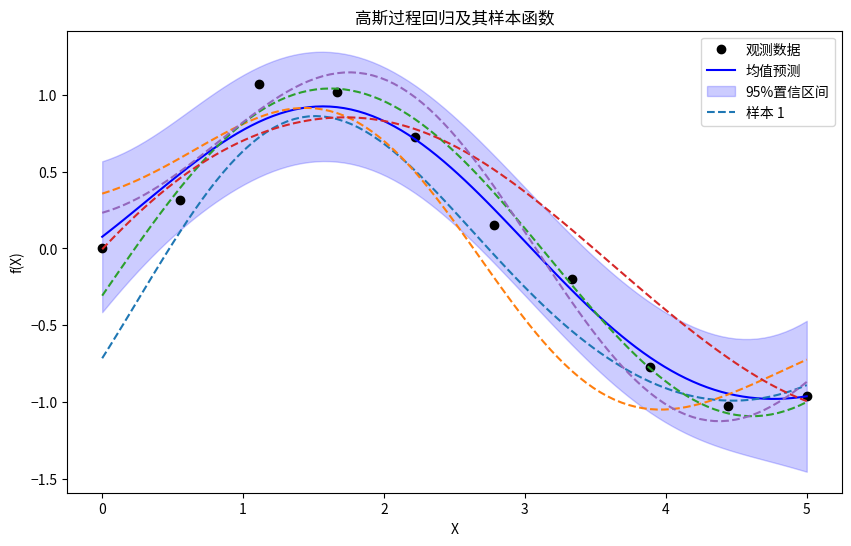

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Source Han Sans CN' # 中文字体, Windows: 'SimHei', Mac: 'Heiti TC'
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# 1. 准备训练数据
X_train = np.linspace(0, 5, 10).reshape(-1, 1)             # 10个观测点，X取0到5的均匀分布
y_train = np.sin(X_train).ravel() + np.random.normal(0, 0.1, 10)  # 目标值为正弦函数加上噪声

# 2. 创建并训练高斯过程回归模型
kernel = RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.1)  # alpha 表示观测噪声水平
gp.fit(X_train, y_train)

# 3. 在新的输入点上进行预测
X_fine = np.linspace(0, 5, 100).reshape(-1, 1)             # 更细的输入网格
mean_prediction, std_prediction = gp.predict(X_fine, return_std=True)

# 4. 使用 gp.sample_y 抽取样本
n_samples = 5
# 返回的 f_samples 形状为 (len(X_fine), n_samples)，每一列是一个样本
f_samples = gp.sample_y(X_fine, n_samples)
f_samples = f_samples.T  # 转置后，每一行是一条完整的样本曲线

# 5. 绘图展示结果
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, 'ko', label="观测数据")
plt.plot(X_fine, mean_prediction, 'b-', label="均值预测")
plt.fill_between(X_fine.ravel(), 
                 mean_prediction - 1.96 * std_prediction,
                 mean_prediction + 1.96 * std_prediction,
                 color='blue', alpha=0.2, label="95%置信区间")

# 绘制抽取的样本曲线
for i in range(n_samples):
    plt.plot(X_fine, f_samples[i], linestyle='--', label=f"样本 {i+1}" if i==0 else None)
plt.xlabel("X")
plt.ylabel("f(X)")
plt.title("高斯过程回归及其样本函数")
plt.legend()
plt.show()
